In [1]:
####
## Celso Antonio Uliana Junior
## July 2 2020
####

import pandas as pd

#####
## Consuming and shaping the data to analysis
## Covid-19 numbers in Brazil by date
## Isolation percentage in Brazil by date
#####

data_raw_covid = pd.read_csv("C:/Users/PCDOMILHAO/Documents/GitHub/trab-siad/scripts/Python/Jupyter/dados/covidBrasil.csv", sep = ";", decimal = ",")
data_covid = data_raw_covid['Data'].values.copy()
data_covid = data_raw_covid.dropna().set_index("Data")

####
## Shaping a central pandas dataFrame for all our ML needs
####

data2 = data_covid

In [2]:
from sklearn.preprocessing import MinMaxScaler

####
## normalizing values for both covid and isolation percentage 
## between range [0,1] using sklearn MinMaxScaler
####

covid_norm = data_covid["Casos"].values.copy()
covid_norm.shape = (len(covid_norm), 1)

####
## Shaping the central dataFrame with normalized values
####
min_max_scaler = MinMaxScaler()

covid_norm = min_max_scaler.fit_transform(covid_norm)

data2["CasosNormalizados"] = covid_norm
data = data2.copy()
#data = data.iloc[20:]
data.head(20)

,Casos,CasosNormalizados
Data,,
26/2/20,1,0.000018
27/2/20,0,0.000000
28/2/20,0,0.000000
29/2/20,0,0.000000
1/3/20,1,0.000018
2/3/20,0,0.000000
3/3/20,0,0.000000
4/3/20,0,0.000000
5/3/20,1,0.000018


In [3]:
####
## Sliding window
####
df = pd.DataFrame()
window_size = 7
for i in range(0, window_size + 1):
    df['E{}'.format(i)] = data['CasosNormalizados'].shift(-i)
df = df.iloc[: -window_size]
print(df)

               E0        E1        E2        E3        E4        E5        E6  \
Data                                                                            
26/2/20  0.000018  0.000000  0.000000  0.000000  0.000018  0.000000  0.000000   
27/2/20  0.000000  0.000000  0.000000  0.000018  0.000000  0.000000  0.000000   
28/2/20  0.000000  0.000000  0.000018  0.000000  0.000000  0.000000  0.000018   
29/2/20  0.000000  0.000018  0.000000  0.000000  0.000000  0.000018  0.000091   
1/3/20   0.000018  0.000000  0.000000  0.000000  0.000018  0.000091  0.000091   
...           ...       ...       ...       ...       ...       ...       ...   
10/6/20  0.585912  0.600920  0.555257  0.474375  0.396268  0.312392  0.376970   
11/6/20  0.600920  0.555257  0.474375  0.396268  0.312392  0.376970  0.637527   
12/6/20  0.555257  0.474375  0.396268  0.312392  0.376970  0.637527  0.587683   
13/6/20  0.474375  0.396268  0.312392  0.376970  0.637527  0.587683  0.415640   
14/6/20  0.396268  0.312392 

In [4]:
####
## Manipulating the data to split into X(a window size of values)
## and target, or Y, the value X "produces"
####

arr = df.values

X = arr[:, : -1]
target = arr[:, -1]
print(X)
print(target)

[[1.82578372e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.82578372e-05 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.82578372e-05
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.82578372e-05 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.82578372e-05]
 [0.00000000e+00 1.82578372e-05 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.82578372e-05 9.12891859e-05]
 [1.82578372e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.82578372e-05 9.12891859e-05 9.12891859e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.82578372e-05
  9.12891859e-05 9.12891859e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.82578372e-05 9.12891859e-05
  9.12891859e-05 0.00000000e+00 2.19094046e-04]
 [0.00000000e+00 1.82578372e-05 9.12891859e-05 9.12891859e-05
  0.00000000e+00 2.19094046e-04 0.00000000e+00]
 [1.82578372e-05 9.12891859e-05 9.12891859e-05 0.00000000e+00
  2.19094046e-04 0.00000000e+00 1.64320535e-04]
 [9.128918

In [5]:
####
## Config of the regressors and cross val leave one out
####

from sklearn import metrics
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

loo = LeaveOneOut()

mlp = MLPRegressor(
    hidden_layer_sizes = (100, 50), alpha = 0.001,
    learning_rate_init = 0.01, max_iter = 1000,
    random_state = 9, verbose = True)
svr = SVR(kernel = 'linear', C = 0.25, epsilon = 0.01, verbose = True, max_iter = 1000)
lr = LinearRegression()

full_predict_lr = cross_val_predict(lr, X, target, cv = 10)
full_predict_mlp = cross_val_predict(mlp, X, target, cv = loo)
full_predict_svr = cross_val_predict(svr, X, target, cv = loo)

Iteration 1, loss = 0.02499385
Iteration 2, loss = 0.05254608
Iteration 3, loss = 0.01592508
Iteration 4, loss = 0.00589378
Iteration 5, loss = 0.01355393
Iteration 6, loss = 0.01611312
Iteration 7, loss = 0.01106270
Iteration 8, loss = 0.00550324
Iteration 9, loss = 0.00423437
Iteration 10, loss = 0.00636684
Iteration 11, loss = 0.00807723
Iteration 12, loss = 0.00748324
Iteration 13, loss = 0.00554845
Iteration 14, loss = 0.00402702
Iteration 15, loss = 0.00376395
Iteration 16, loss = 0.00442603
Iteration 17, loss = 0.00523676
Iteration 18, loss = 0.00557726
Iteration 19, loss = 0.00525340
Iteration 20, loss = 0.00446769
Iteration 21, loss = 0.00363869
Iteration 22, loss = 0.00317070
Iteration 23, loss = 0.00322508
Iteration 24, loss = 0.00361537
Iteration 25, loss = 0.00394995
Iteration 26, loss = 0.00394085
Iteration 27, loss = 0.00361370
Iteration 28, loss = 0.00323024
Iteration 29, loss = 0.00303098
Iteration 30, loss = 0.00307045
Iteration 31, loss = 0.00322442
Iteration 32, los

Iteration 11, loss = 0.00807721
Iteration 12, loss = 0.00748322
Iteration 13, loss = 0.00554844
Iteration 14, loss = 0.00402702
Iteration 15, loss = 0.00376395
Iteration 16, loss = 0.00442603
Iteration 17, loss = 0.00523676
Iteration 18, loss = 0.00557726
Iteration 19, loss = 0.00525340
Iteration 20, loss = 0.00446769
Iteration 21, loss = 0.00363869
Iteration 22, loss = 0.00317070
Iteration 23, loss = 0.00322508
Iteration 24, loss = 0.00361537
Iteration 25, loss = 0.00394994
Iteration 26, loss = 0.00394084
Iteration 27, loss = 0.00361370
Iteration 28, loss = 0.00323024
Iteration 29, loss = 0.00303098
Iteration 30, loss = 0.00307045
Iteration 31, loss = 0.00322442
Iteration 32, loss = 0.00332467
Iteration 33, loss = 0.00327675
Iteration 34, loss = 0.00310293
Iteration 35, loss = 0.00290576
Iteration 36, loss = 0.00280807
Iteration 37, loss = 0.00285900
Iteration 38, loss = 0.00293980
Iteration 39, loss = 0.00294925
Iteration 40, loss = 0.00287939
Iteration 41, loss = 0.00278019
Iteratio

Iteration 11, loss = 0.00807787
Iteration 12, loss = 0.00748329
Iteration 13, loss = 0.00554807
Iteration 14, loss = 0.00402676
Iteration 15, loss = 0.00376413
Iteration 16, loss = 0.00442643
Iteration 17, loss = 0.00523750
Iteration 18, loss = 0.00557803
Iteration 19, loss = 0.00525377
Iteration 20, loss = 0.00446758
Iteration 21, loss = 0.00363832
Iteration 22, loss = 0.00317016
Iteration 23, loss = 0.00322470
Iteration 24, loss = 0.00361518
Iteration 25, loss = 0.00394962
Iteration 26, loss = 0.00394016
Iteration 27, loss = 0.00361305
Iteration 28, loss = 0.00322964
Iteration 29, loss = 0.00303040
Iteration 30, loss = 0.00306988
Iteration 31, loss = 0.00322295
Iteration 32, loss = 0.00332335
Iteration 33, loss = 0.00327538
Iteration 34, loss = 0.00310129
Iteration 35, loss = 0.00290351
Iteration 36, loss = 0.00280643
Iteration 37, loss = 0.00285887
Iteration 38, loss = 0.00294001
Iteration 39, loss = 0.00294861
Iteration 40, loss = 0.00287874
Iteration 41, loss = 0.00277926
Iteratio

Iteration 43, loss = 0.00266080
Iteration 44, loss = 0.00266919
Iteration 45, loss = 0.00268784
Iteration 46, loss = 0.00268284
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.02499374
Iteration 2, loss = 0.05256180
Iteration 3, loss = 0.01592702
Iteration 4, loss = 0.00589568
Iteration 5, loss = 0.01355704
Iteration 6, loss = 0.01611753
Iteration 7, loss = 0.01106567
Iteration 8, loss = 0.00550504
Iteration 9, loss = 0.00423643
Iteration 10, loss = 0.00636862
Iteration 11, loss = 0.00807749
Iteration 12, loss = 0.00748279
Iteration 13, loss = 0.00554830
Iteration 14, loss = 0.00402719
Iteration 15, loss = 0.00376457
Iteration 16, loss = 0.00442666
Iteration 17, loss = 0.00523767
Iteration 18, loss = 0.00557817
Iteration 19, loss = 0.00525429
Iteration 20, loss = 0.00446848
Iteration 21, loss = 0.00363921
Iteration 22, loss = 0.00317048
Iteration 23, loss = 0.00322418
Iteration 24, loss = 0.00361396
Iteration 25, loss = 0.

Iteration 11, loss = 0.00807738
Iteration 12, loss = 0.00748239
Iteration 13, loss = 0.00554787
Iteration 14, loss = 0.00402728
Iteration 15, loss = 0.00376504
Iteration 16, loss = 0.00442741
Iteration 17, loss = 0.00523842
Iteration 18, loss = 0.00557883
Iteration 19, loss = 0.00525458
Iteration 20, loss = 0.00446824
Iteration 21, loss = 0.00363870
Iteration 22, loss = 0.00317032
Iteration 23, loss = 0.00322475
Iteration 24, loss = 0.00361535
Iteration 25, loss = 0.00394990
Iteration 26, loss = 0.00394058
Iteration 27, loss = 0.00361349
Iteration 28, loss = 0.00322997
Iteration 29, loss = 0.00303069
Iteration 30, loss = 0.00307011
Iteration 31, loss = 0.00322322
Iteration 32, loss = 0.00332433
Iteration 33, loss = 0.00327698
Iteration 34, loss = 0.00310304
Iteration 35, loss = 0.00290480
Iteration 36, loss = 0.00280669
Iteration 37, loss = 0.00285917
Iteration 38, loss = 0.00294093
Iteration 39, loss = 0.00294995
Iteration 40, loss = 0.00287997
Iteration 41, loss = 0.00278007
Iteratio

Iteration 33, loss = 0.00327489
Iteration 34, loss = 0.00310126
Iteration 35, loss = 0.00290375
Iteration 36, loss = 0.00280622
Iteration 37, loss = 0.00285813
Iteration 38, loss = 0.00293928
Iteration 39, loss = 0.00294802
Iteration 40, loss = 0.00287830
Iteration 41, loss = 0.00277879
Iteration 42, loss = 0.00269557
Iteration 43, loss = 0.00266022
Iteration 44, loss = 0.00266846
Iteration 45, loss = 0.00268729
Iteration 46, loss = 0.00268240
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.02499217
Iteration 2, loss = 0.05258108
Iteration 3, loss = 0.01593147
Iteration 4, loss = 0.00589601
Iteration 5, loss = 0.01356133
Iteration 6, loss = 0.01612209
Iteration 7, loss = 0.01106920
Iteration 8, loss = 0.00550826
Iteration 9, loss = 0.00423981
Iteration 10, loss = 0.00637055
Iteration 11, loss = 0.00807782
Iteration 12, loss = 0.00748280
Iteration 13, loss = 0.00554889
Iteration 14, loss = 0.00402893
Iteration 15, loss = 0.

Iteration 7, loss = 0.01107346
Iteration 8, loss = 0.00551206
Iteration 9, loss = 0.00424190
Iteration 10, loss = 0.00636908
Iteration 11, loss = 0.00807499
Iteration 12, loss = 0.00748309
Iteration 13, loss = 0.00555205
Iteration 14, loss = 0.00403202
Iteration 15, loss = 0.00376875
Iteration 16, loss = 0.00442956
Iteration 17, loss = 0.00524053
Iteration 18, loss = 0.00558150
Iteration 19, loss = 0.00525877
Iteration 20, loss = 0.00447376
Iteration 21, loss = 0.00364326
Iteration 22, loss = 0.00317170
Iteration 23, loss = 0.00322285
Iteration 24, loss = 0.00361187
Iteration 25, loss = 0.00394789
Iteration 26, loss = 0.00394176
Iteration 27, loss = 0.00361661
Iteration 28, loss = 0.00323321
Iteration 29, loss = 0.00303262
Iteration 30, loss = 0.00307043
Iteration 31, loss = 0.00322292
Iteration 32, loss = 0.00332336
Iteration 33, loss = 0.00327609
Iteration 34, loss = 0.00310294
Iteration 35, loss = 0.00290538
Iteration 36, loss = 0.00280709
Iteration 37, loss = 0.00285846
Iteration 3

Iteration 21, loss = 0.00364186
Iteration 22, loss = 0.00317005
Iteration 23, loss = 0.00322223
Iteration 24, loss = 0.00361233
Iteration 25, loss = 0.00394878
Iteration 26, loss = 0.00394249
Iteration 27, loss = 0.00361682
Iteration 28, loss = 0.00323289
Iteration 29, loss = 0.00303186
Iteration 30, loss = 0.00306908
Iteration 31, loss = 0.00322161
Iteration 32, loss = 0.00332251
Iteration 33, loss = 0.00327598
Iteration 34, loss = 0.00310309
Iteration 35, loss = 0.00290533
Iteration 36, loss = 0.00280637
Iteration 37, loss = 0.00285733
Iteration 38, loss = 0.00293886
Iteration 39, loss = 0.00294849
Iteration 40, loss = 0.00287906
Iteration 41, loss = 0.00277949
Iteration 42, loss = 0.00269595
Iteration 43, loss = 0.00265993
Iteration 44, loss = 0.00266765
Iteration 45, loss = 0.00268635
Iteration 46, loss = 0.00268206
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.02498813
Iteration 2, loss = 0.05261044
Iteration 3, los

Iteration 44, loss = 0.00266807
Iteration 45, loss = 0.00268670
Iteration 46, loss = 0.00268200
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.02498408
Iteration 2, loss = 0.05261954
Iteration 3, loss = 0.01592830
Iteration 4, loss = 0.00589614
Iteration 5, loss = 0.01357567
Iteration 6, loss = 0.01612982
Iteration 7, loss = 0.01106983
Iteration 8, loss = 0.00551234
Iteration 9, loss = 0.00424756
Iteration 10, loss = 0.00637071
Iteration 11, loss = 0.00807188
Iteration 12, loss = 0.00747814
Iteration 13, loss = 0.00554930
Iteration 14, loss = 0.00403178
Iteration 15, loss = 0.00377018
Iteration 16, loss = 0.00443110
Iteration 17, loss = 0.00524099
Iteration 18, loss = 0.00558056
Iteration 19, loss = 0.00525671
Iteration 20, loss = 0.00447135
Iteration 21, loss = 0.00364141
Iteration 22, loss = 0.00317076
Iteration 23, loss = 0.00322295
Iteration 24, loss = 0.00361221
Iteration 25, loss = 0.00394773
Iteration 26, loss = 0.

Iteration 10, loss = 0.00636740
Iteration 11, loss = 0.00806681
Iteration 12, loss = 0.00747583
Iteration 13, loss = 0.00555161
Iteration 14, loss = 0.00403765
Iteration 15, loss = 0.00377457
Iteration 16, loss = 0.00443277
Iteration 17, loss = 0.00524050
Iteration 18, loss = 0.00558057
Iteration 19, loss = 0.00525987
Iteration 20, loss = 0.00447709
Iteration 21, loss = 0.00364626
Iteration 22, loss = 0.00317287
Iteration 23, loss = 0.00322149
Iteration 24, loss = 0.00360974
Iteration 25, loss = 0.00394641
Iteration 26, loss = 0.00394206
Iteration 27, loss = 0.00361873
Iteration 28, loss = 0.00323567
Iteration 29, loss = 0.00303466
Iteration 30, loss = 0.00306995
Iteration 31, loss = 0.00322129
Iteration 32, loss = 0.00332119
Iteration 33, loss = 0.00327509
Iteration 34, loss = 0.00310424
Iteration 35, loss = 0.00290881
Iteration 36, loss = 0.00281000
Iteration 37, loss = 0.00285936
Iteration 38, loss = 0.00293974
Iteration 39, loss = 0.00294940
Iteration 40, loss = 0.00287956
Iteratio

Iteration 33, loss = 0.00326320
Iteration 34, loss = 0.00309261
Iteration 35, loss = 0.00289777
Iteration 36, loss = 0.00280053
Iteration 37, loss = 0.00285200
Iteration 38, loss = 0.00293253
Iteration 39, loss = 0.00294119
Iteration 40, loss = 0.00287157
Iteration 41, loss = 0.00277231
Iteration 42, loss = 0.00268952
Iteration 43, loss = 0.00265412
Iteration 44, loss = 0.00266245
Iteration 45, loss = 0.00268177
Iteration 46, loss = 0.00267738
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.02495421
Iteration 2, loss = 0.05267922
Iteration 3, loss = 0.01590163
Iteration 4, loss = 0.00589316
Iteration 5, loss = 0.01360436
Iteration 6, loss = 0.01614701
Iteration 7, loss = 0.01107964
Iteration 8, loss = 0.00552636
Iteration 9, loss = 0.00425584
Iteration 10, loss = 0.00636701
Iteration 11, loss = 0.00806260
Iteration 12, loss = 0.00747669
Iteration 13, loss = 0.00555971
Iteration 14, loss = 0.00404825
Iteration 15, loss = 0.

Iteration 7, loss = 0.01105832
Iteration 8, loss = 0.00549545
Iteration 9, loss = 0.00425165
Iteration 10, loss = 0.00638499
Iteration 11, loss = 0.00804558
Iteration 12, loss = 0.00739964
Iteration 13, loss = 0.00547910
Iteration 14, loss = 0.00398717
Iteration 15, loss = 0.00374543
Iteration 16, loss = 0.00441299
Iteration 17, loss = 0.00522042
Iteration 18, loss = 0.00555586
Iteration 19, loss = 0.00522858
Iteration 20, loss = 0.00444291
Iteration 21, loss = 0.00361706
Iteration 22, loss = 0.00314980
Iteration 23, loss = 0.00320235
Iteration 24, loss = 0.00359060
Iteration 25, loss = 0.00392657
Iteration 26, loss = 0.00392326
Iteration 27, loss = 0.00360278
Iteration 28, loss = 0.00322181
Iteration 29, loss = 0.00302145
Iteration 30, loss = 0.00305586
Iteration 31, loss = 0.00320810
Iteration 32, loss = 0.00330875
Iteration 33, loss = 0.00326303
Iteration 34, loss = 0.00309280
Iteration 35, loss = 0.00289764
Iteration 36, loss = 0.00279837
Iteration 37, loss = 0.00284695
Iteration 3

Iteration 13, loss = 0.00554541
Iteration 14, loss = 0.00404591
Iteration 15, loss = 0.00378959
Iteration 16, loss = 0.00444464
Iteration 17, loss = 0.00524504
Iteration 18, loss = 0.00558366
Iteration 19, loss = 0.00526417
Iteration 20, loss = 0.00448126
Iteration 21, loss = 0.00364715
Iteration 22, loss = 0.00316711
Iteration 23, loss = 0.00320723
Iteration 24, loss = 0.00359079
Iteration 25, loss = 0.00393475
Iteration 26, loss = 0.00394399
Iteration 27, loss = 0.00362988
Iteration 28, loss = 0.00324603
Iteration 29, loss = 0.00303421
Iteration 30, loss = 0.00305860
Iteration 31, loss = 0.00320549
Iteration 32, loss = 0.00330923
Iteration 33, loss = 0.00327163
Iteration 34, loss = 0.00310743
Iteration 35, loss = 0.00291189
Iteration 36, loss = 0.00280783
Iteration 37, loss = 0.00285104
Iteration 38, loss = 0.00293260
Iteration 39, loss = 0.00294602
Iteration 40, loss = 0.00287845
Iteration 41, loss = 0.00277953
Iteration 42, loss = 0.00269480
Iteration 43, loss = 0.00265586
Iteratio

Iteration 52, loss = 0.00257222
Iteration 53, loss = 0.00254942
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.02453584
Iteration 2, loss = 0.05288833
Iteration 3, loss = 0.01574508
Iteration 4, loss = 0.00592009
Iteration 5, loss = 0.01377523
Iteration 6, loss = 0.01624272
Iteration 7, loss = 0.01108332
Iteration 8, loss = 0.00549651
Iteration 9, loss = 0.00424548
Iteration 10, loss = 0.00638227
Iteration 11, loss = 0.00808066
Iteration 12, loss = 0.00747118
Iteration 13, loss = 0.00556721
Iteration 14, loss = 0.00405955
Iteration 15, loss = 0.00378734
Iteration 16, loss = 0.00442747
Iteration 17, loss = 0.00522462
Iteration 18, loss = 0.00557137
Iteration 19, loss = 0.00526468
Iteration 20, loss = 0.00449263
Iteration 21, loss = 0.00365763
Iteration 22, loss = 0.00316555
Iteration 23, loss = 0.00319377
Iteration 24, loss = 0.00357489
Iteration 25, loss = 0.00392827
Iteration 26, loss = 0.00394931
Iteration 27, loss = 0.

Iteration 8, loss = 0.00545644
Iteration 9, loss = 0.00418614
Iteration 10, loss = 0.00633987
Iteration 11, loss = 0.00806773
Iteration 12, loss = 0.00746409
Iteration 13, loss = 0.00555153
Iteration 14, loss = 0.00402936
Iteration 15, loss = 0.00373639
Iteration 16, loss = 0.00436775
Iteration 17, loss = 0.00517031
Iteration 18, loss = 0.00553480
Iteration 19, loss = 0.00525204
Iteration 20, loss = 0.00449129
Iteration 21, loss = 0.00364949
Iteration 22, loss = 0.00313631
Iteration 23, loss = 0.00314245
Iteration 24, loss = 0.00351750
Iteration 25, loss = 0.00388292
Iteration 26, loss = 0.00392566
Iteration 27, loss = 0.00362941
Iteration 28, loss = 0.00323582
Iteration 29, loss = 0.00300043
Iteration 30, loss = 0.00300599
Iteration 31, loss = 0.00315098
Iteration 32, loss = 0.00326859
Iteration 33, loss = 0.00325055
Iteration 34, loss = 0.00309997
Iteration 35, loss = 0.00290770
Iteration 36, loss = 0.00278188
Iteration 37, loss = 0.00279307
Iteration 38, loss = 0.00287264
Iteration 

Iteration 36, loss = 0.00279245
Iteration 37, loss = 0.00282355
Iteration 38, loss = 0.00290806
Iteration 39, loss = 0.00292861
Iteration 40, loss = 0.00286684
Iteration 41, loss = 0.00276867
Iteration 42, loss = 0.00268400
Iteration 43, loss = 0.00264215
Iteration 44, loss = 0.00264557
Iteration 45, loss = 0.00266519
Iteration 46, loss = 0.00266725
Iteration 47, loss = 0.00263925
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.02386412
Iteration 2, loss = 0.05303455
Iteration 3, loss = 0.01549372
Iteration 4, loss = 0.00586782
Iteration 5, loss = 0.01398064
Iteration 6, loss = 0.01644635
Iteration 7, loss = 0.01117243
Iteration 8, loss = 0.00544675
Iteration 9, loss = 0.00415698
Iteration 10, loss = 0.00636426
Iteration 11, loss = 0.00812087
Iteration 12, loss = 0.00749220
Iteration 13, loss = 0.00558133
Iteration 14, loss = 0.00403911
Iteration 15, loss = 0.00372089
Iteration 16, loss = 0.00433465
Iteration 17, loss = 0.

Iteration 10, loss = 0.00630746
Iteration 11, loss = 0.00811459
Iteration 12, loss = 0.00760622
Iteration 13, loss = 0.00568447
Iteration 14, loss = 0.00409861
Iteration 15, loss = 0.00374211
Iteration 16, loss = 0.00434000
Iteration 17, loss = 0.00515196
Iteration 18, loss = 0.00555058
Iteration 19, loss = 0.00530172
Iteration 20, loss = 0.00455969
Iteration 21, loss = 0.00371275
Iteration 22, loss = 0.00317577
Iteration 23, loss = 0.00315660
Iteration 24, loss = 0.00352260
Iteration 25, loss = 0.00390528
Iteration 26, loss = 0.00397140
Iteration 27, loss = 0.00368560
Iteration 28, loss = 0.00328196
Iteration 29, loss = 0.00302594
Iteration 30, loss = 0.00301398
Iteration 31, loss = 0.00315647
Iteration 32, loss = 0.00328588
Iteration 33, loss = 0.00328471
Iteration 34, loss = 0.00314245
Iteration 35, loss = 0.00294149
Iteration 36, loss = 0.00280707
Iteration 37, loss = 0.00282134
Iteration 38, loss = 0.00290766
Iteration 39, loss = 0.00293828
Iteration 40, loss = 0.00288517
Iteratio

Iteration 27, loss = 0.00365450
Iteration 28, loss = 0.00325782
Iteration 29, loss = 0.00300185
Iteration 30, loss = 0.00298591
Iteration 31, loss = 0.00312535
Iteration 32, loss = 0.00325535
Iteration 33, loss = 0.00325733
Iteration 34, loss = 0.00312167
Iteration 35, loss = 0.00293076
Iteration 36, loss = 0.00279370
Iteration 37, loss = 0.00279042
Iteration 38, loss = 0.00286942
Iteration 39, loss = 0.00291999
Iteration 40, loss = 0.00289939
Iteration 41, loss = 0.00281641
Iteration 42, loss = 0.00271277
Iteration 43, loss = 0.00264234
Iteration 44, loss = 0.00262987
Iteration 45, loss = 0.00265367
Iteration 46, loss = 0.00267387
Iteration 47, loss = 0.00265897
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.02373537
Iteration 2, loss = 0.05302049
Iteration 3, loss = 0.01545025
Iteration 4, loss = 0.00595699
Iteration 5, loss = 0.01405832
Iteration 6, loss = 0.01644919
Iteration 7, loss = 0.01113710
Iteration 8, loss = 0

In [6]:
####
## Printing some metrics of the regressors
####

print('Mean Squared Error in LR: %s' %(metrics.mean_squared_error(target, full_predict_lr)))
print('Mean Squared Error in MLP: %s' %(metrics.mean_squared_error(target, full_predict_mlp)))
print('Mean Squared Error in SVR: %s' %(metrics.mean_squared_error(target, full_predict_svr)))

r_squared_lr = metrics.r2_score(target, full_predict_lr)
r_squared_mlp = metrics.r2_score(target, full_predict_mlp)
r_squared_svr = metrics.r2_score(target, full_predict_svr)

print('R² score in LR: %s' %(r_squared_lr))
print('R² score in MLP: %s' %(r_squared_mlp))
print('R² score in SVR: %s' %(r_squared_svr))

adjusted_r_squared_lr = 1 - (1 - r_squared_lr) * (len(target) - 1) / (len(target) - X.shape[1] - 1)
adjusted_r_squared_mlp = 1 - (1 - r_squared_mlp) * (len(target) - 1) / (len(target) - X.shape[1] - 1)
adjusted_r_squared_svr = 1 - (1 - r_squared_svr) * (len(target) - 1) / (len(target) - X.shape[1] - 1)

print('adjusted R² score in LR: %s' %(adjusted_r_squared_lr))
print('adjusted R² score in MLP: %s' %(adjusted_r_squared_mlp))
print('adjusted R² score in SVR: %s' %(adjusted_r_squared_svr))

Mean Squared Error in LR: 0.00599490799826504
Mean Squared Error in MLP: 0.005956410936480039
Mean Squared Error in SVR: 0.005935750349804434
R² score in LR: 0.8612230866468593
R² score in MLP: 0.8621142601910127
R² score in SVR: 0.8625925348280439
adjusted R² score in LR: 0.8516991808285065
adjusted R² score in MLP: 0.8526515133413763
adjusted R² score in SVR: 0.8531626107476156


In [7]:
####
## Filling lists with NaN so the len is the same across all lists 
## so that a graph can be generated
####
import numpy as np

values_to_add = list()
for i in range(0, window_size):
    values_to_add.append(float('NaN'))
    
full_predict_svr = np.insert(full_predict_svr, 0, values_to_add)
full_predict_svr.shape = (len(full_predict_svr), 1)
    
full_predict_mlp = np.insert(full_predict_mlp, 0, values_to_add)
full_predict_mlp.shape = (len(full_predict_mlp), 1)

full_predict_lr = np.insert(full_predict_lr, 0, values_to_add)
full_predict_lr.shape = (len(full_predict_lr), 1)

In [8]:
####
## Adding the data to plot 
####

data['Predict_lr'] = full_predict_lr
data['Predict_mlp'] = full_predict_mlp
data['Predict_svr'] = full_predict_svr

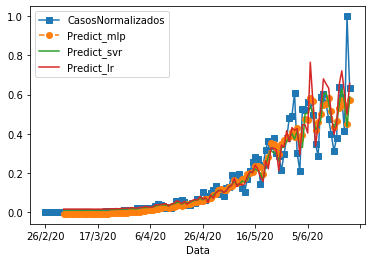

In [9]:
import matplotlib.pyplot as plt
data.plot(y=['CasosNormalizados', 'Predict_mlp', 'Predict_svr', 'Predict_lr'], style=['-s', '--o'])
plt.show()